# COGS 108 - Assignment 3: Data Exploration

This assignment covers data wrangling, EDA, and dataviz.

This assignment is out of 7.5 points, worth 7.5% of your grade.

**PLEASE DO NOT CHANGE THE NAME OF THIS FILE.**

**PLEASE DO NOT COPY & PASTE OR DELETE CELLS INLCUDED IN THE ASSIGNMENT.** 

# Assignment reminders

**This assignment has more questions than either A1 or A2! Get started as early as possible.**

- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted assignment. This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!

- Each coding question in this assignment only requires a small amount of code, about 1-3 lines. 
    - If you find yourself writing much more than that, you might want to reconsider your approach. 
    - Use the Tutorials notebooks as reference, as they often contain similar examples to those used in the assignment.

In [1]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

## Part 1 - Data Wrangling (1.45 points)

For this assignment, you are provided with two data files that contain information on a sample of people. The two files and their columns are:

- `age_steps.csv`: Contains one row for each person.
    - `id`: Unique identifier for the person.
    - `age`: Age of the person.
    - `steps`: Number of steps the person took on average in January 2018.
    
    
- `incomes.json`: Contains one record for each person.
    - `id`: Unique identifier for the person. Two records with the same ID between `age_steps.csv` and `incomes.json` correspond to the same person.
    - `last_name`: Last name of the person.
    - `first_name`: First name of the person.
    - `income`: Income of the person in 2018.
    
For part 1 and 2 of the assignment, we recommend looking at the official 10 minutes to pandas guide: http://pandas.pydata.org/pandas-docs/stable/10min.html

**Question 1a:** Load the `age_steps.csv` file into a `pandas` DataFrame named `df_steps`. It should have 11257 rows and 3 columns.

In [3]:
# YOUR CODE HERE
df_steps = pd.read_csv('age_steps.csv')

In [4]:
assert isinstance(df_steps, pd.DataFrame)
assert df_steps.shape == (11257, 3)


**Question 1b:** Load the `incomes.json` file into a `pandas` DataFrame called `df_income`. The DataFrame should have 13332 rows and 4 columns. 

Hint: Find a pandas function similar to `read_csv` for JSON files.


In [5]:
# YOUR CODE HERE
df_income = pd.read_json('incomes.json')

In [6]:
assert isinstance(df_income, pd.DataFrame)
assert df_income.shape == (13332, 4)


**Question 1c:** Drop the `first_name` and `last_name` columns from the `df_income` DataFrame. The resulting DataFrame should only have two columns.

In [7]:
# YOUR CODE HERE
df_income = df_income.drop(labels=['first_name','last_name'],axis=1)
df_income.head()

,id,income
0,84764,99807.16
1,49337,0.00
2,54204,5242.96
3,41693,0.00
4,98170,18077.78


In [8]:
assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns


**Question 1d:** Merge the `df_steps` and `df_income` DataFrames into a single combined DataFrame called `df`. Use the `id` column to match rows together.

The final DataFrame should have 9623 rows and 4 columns: `id`, `income`, `age`, and `steps`.

Call an appropriate `pandas` method to perform this operation; don't write a `for` loop. (In general, writing a `for` loop for a DataFrame will produce poor results.)

In [9]:
# YOUR CODE HERE
df_steps.set_index('id')
df_income.set_index('id')
df = df_steps.merge(df_income)
df

,id,age,steps,income
0,36859,48,6764,10056.43
1,99794,39,4308,13869.47
2,33364,36,6410,79634.92
...,...,...,...,...
10132,52336,41,-1,0.00
10133,54972,44,7548,18350.20
10134,17411,43,8765,88965.55


In [10]:
assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])
assert df.shape == (10135, 4)


**Question 1e:** Reorder the columns of `df` so that they appear in the order: `id`, `age`, `steps`, then `income`.

(Note: If your DataFrame is already in this order, just put `df` in this cell.)

In [11]:
# YOUR CODE HERE
df

,id,age,steps,income
0,36859,48,6764,10056.43
1,99794,39,4308,13869.47
2,33364,36,6410,79634.92
...,...,...,...,...
10132,52336,41,-1,0.00
10133,54972,44,7548,18350.20
10134,17411,43,8765,88965.55


In [12]:
assert list(df.columns) == ['id', 'age', 'steps', 'income']

**Question 1f:** You may have noticed something strange: the merged `df` DataFrame has fewer rows than either of `df_steps` and `df_income`. Why did this happen? (If you're unsure, check out the documentation for the `pandas` method you used to merge these two datasets. Take note of the default values set for this method's parameters.)

Please select the **one** correct explanation below and save your answer in the variable `q1f_answer`. For example, if you believe choice number 4 explains why `df` has fewer rows, set `q1f_answer = 4`.

1. Some steps were recorded inaccurately in `df_steps`.
2. Some incomes were recorded inaccurately in `df_income`.
3. There are fewer rows in `df_steps` than in `df_income`.
4. There are fewer columns in `df_steps` than in `df_income`.
5. Some `id` values in either `df_steps` and `df_income` were missing in the other DataFrame.
6. Some `id` values were repeated in `df_steps` and in `df_income`.

You may use the cell below to run whatever code you want to check the statements above. Just make sure to set `q1f_answer` once you've selected a choice.

In [13]:
# YOUR CODE HERE
q1f_answer = 5

In [14]:
assert isinstance(q1f_answer, int)


## Part 2 - Data Cleaning (0.9 points)

Before proceeding with analysis, we need to check our data for missing values.

There are many reasons data might contain missing values. Here are two common ones:

- **Nonresponse.** For example, people might have left a field blank when responding to a survey, or left the entire survey blank.
- **Lost in entry.** Data might have been lost after initial recording. For example, a disk cleanup might accidentally wipe older entries of a database.

In general, it is **not** appropriate to simply drop missing values from the dataset or pretend that if filled in they would not change your results. In 2016, many polls mistakenly predicted that Hillary Clinton would easily win the Presidential election by committing this error.

In this particular dataset, however, the **missing values occur completely at random**. This criteria allows us to drop missing values without significantly affecting our conclusions.

**Question 2a:** How many values are missing in the `income` column of `df`? Save this number into a variable called `n_nan`.

In [15]:
# YOUR CODE HERE
n_nan = sum(df['income'].isnull())
n_nan

451

In [16]:
assert(n_nan)


**Question 2b:** Remove all rows from `df` that have missing values.

In [17]:
# Remove all rows from df that have missing data. In other words, remove all rows with NaN values.

# YOUR CODE HERE
df = df.dropna()

In [18]:
assert sum(np.isnan(df['income'])) == 0
assert df.shape == (9684, 4)


**Question 2c:** Note that we can now compute the average income. If your `df` variable contains the right values, `df['income'].mean()` should produce the value `25508.84`.

Suppose that we didn't drop the missing incomes. What will running `df['income'].mean()` output? Use the variable `q2c_answer` to record which of the below statements you think is true. As usual, you can use the cell below to run any code you'd like in order to help you answer this question as long as you set `q2c_answer` once you've finished.

1. No change; `df['income'].mean()` will ignore the missing values and output `25508.84`.
2. `df['income'].mean()` will produce an error.
3. `df['income'].mean()` will output `0`.
4. `df['income'].mean()` will output `nan` (not a number).
5. `df['income'].mean()` will fill in the missing values with the average income, then compute the average.
6. `df['income'].mean()` will fill in the missing values with `0`, then compute the average.

In [19]:
# YOUR CODE HERE
q2c_answer = 1

In [20]:
assert isinstance(q2c_answer, int)


**Question 2d:** Suppose that missing incomes did not occur at random, and that individuals with incomes below \$10000 a year are less likely to report their incomes. If so, which of the following statements below is true? Record your choice in the variable `q2d_answer`.

1. `df['income'].mean()` will likely output a value that is the same as the population's average income
2. `df['income'].mean()` will likely output a value that is smaller than the population's average income.
3. `df['income'].mean()` will likely output a value that is larger than the population's average income.
4. `df['income'].mean()` will raise an error.

In [21]:
# YOUR CODE HERE
q2d_answer = 3

In [22]:
assert isinstance(q2d_answer, int)


## Part 3: Data Visualization (0.9 points)

Although `pandas` only displays a few rows of a DataFrame at a time, we can use data visualizations to quickly determine the **distributions** of values within our data.


`pandas` comes with some plotting capabilities built-in; however, we've discussed using `seaborn` for visualization in class. You're free to use either here in this assignment. (To learn more about `pandas`' plotting capabilities, we suggest taking a look at [https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html] for examples.)

We want to note that most plotting libraries in Python are built on top of a library called [`matplotlib`](https://matplotlib.org/), including the plotting methods used in both `pandas` and `seaborn`. Although you won't need to know `matplotlib` for this assignment, you will likely have to use it in future assignments and your final project, so keep the library in mind.


Notes:

- Everywhere that we ask you to create a plot, make sure to leave the `plt.gcf()` line at the end of the cell. Otherwise, you will lose points in the autograder.
- For all your histograms, use **25 bins**.

**Question 3a:** Plot a histogram of the `age` column with 25 bins.

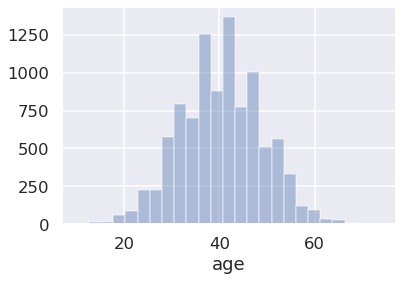

In [23]:
# YOUR CODE HERE
sns.distplot(df['age'], kde=False, bins=25)

f1 = plt.gcf()

In [24]:
assert f1.gca().has_data()

# If you fail this test, you didn't use 25 bins for your histogram.
assert len(f1.gca().patches) == 25

**Question 3b:** By looking at the plot, what is the approximate average (mean) age of the individuals in `df`? Round the value to the closest year. Store the answer in the variable `average_age`

In [25]:
# YOUR CODE HERE
average_age = 40

In [26]:
assert isinstance(average_age, int)



**Question 3c:** Plot a histogram of the `steps` column with 25 bins.

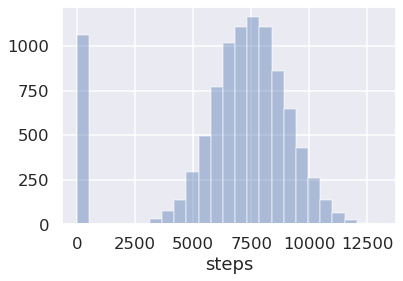

In [27]:
# YOUR CODE HERE
sns.distplot(df['steps'], kde=False, bins=25)

f2 = plt.gcf()

In [28]:
assert f2.gca().has_data()

**Question 3d:** By looking at the plot you just generated, approximately how many people in `df` do the data suggest took no steps? Store the letter that best corresponds to your answer in the variable `no_steps`. (For example, if you thought the answer was `A) 0`, your response would be `no_steps = 'A'`.

- A) 0
- B) 100
- C) 1000
- D) 10000

In [29]:
# YOUR CODE HERE
no_steps = 'C'

In [30]:
assert isinstance(no_steps, str)


**Question 3e:** Plot a histogram of the `income` column with 25 bins.

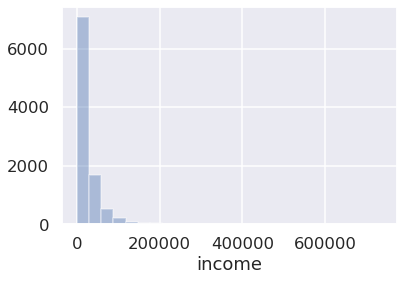

In [31]:
# YOUR CODE HERE
sns.distplot(df['income'], kde=False, bins=25)

f3 = plt.gcf()

In [32]:
assert f3.gca().has_data()

**Question 3f** Which of the following statements is true about the income of the individuals included in `df`? Store the letter corresponding to your answer in the variable `income_plot`.

- A) Most people in `df` had no income in 2018
- B) Most people in `df` made a six figure salary in 2018
- C) Most people in `df` made a salary of more than 200000 USD in 2018
- D) A few people in `df` made a lot more money than the typical person in `df` 

In [33]:
# YOUR CODE HERE
income_plot = 'A'

In [34]:
assert isinstance(income_plot, str)


**Question 3g:** Plot the data using the `pandas` `scatter_matrix` function. Only plot the `age`, `steps`, and `income` columns.

Note: Including the parameter: `figsize = (8, 6)` will increase the size of the plot for easier viewing

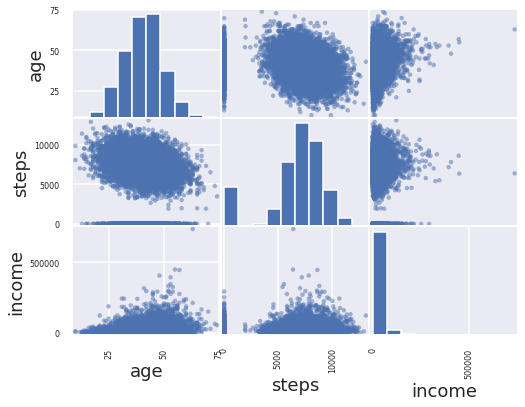

In [35]:
# YOUR CODE HERE
from pandas.plotting import scatter_matrix
scatter_matrix(df[['age','steps','income']],figsize=(8,6))

f4 = plt.gcf()

In [36]:
assert f4.gca().has_data()

**Question 3h:** By looking at the plot matrix you just generated, deteremine the approximate age of the wealthiest person in `df`. Store this value (to the nearest year) in the variable `wealthy_age`.

In [37]:
# YOUR CODE HERE
wealthy_age = 63

In [38]:
assert isinstance(wealthy_age, int)



## Part 4: Data Pre-Processing (1.45 points)

In the above sections, we performed basic data cleaning and visualization. 

In practice, these two components of an analysis pipeline are often combined into an iterative approach. We go back and forth between looking at the data, checking for issues, and cleaning the data. 

Let's continue with an iterative procedure of data cleaning and visualization, addressing some issues that we notice after visualizing the data.

**Question 4a:** In the visualization of the `steps` column, we notice a large number of `-1` values. Count how many rows in `df` have `-1` in their `steps` column. Store the result in the variable `n_neg`.

In [39]:
# YOUR CODE HERE
df[df['steps']==-1]
n_neg = 1062

In [40]:
assert(n_neg)
assert n_neg > 100


**Question 4b:** Since it's impossible to walk a negative number of steps, we will treat the negative values as missing data. Drop the rows with negative steps from `df`. Your answer should modify `df` itself.

In [41]:
# YOUR CODE HERE
df = df.drop(df.loc[df['steps']==-1].index)

In [42]:
assert sum(df['steps'] == -1) == 0


You may have noticed that the values in `income` are not normally distributed which can hurt prediction ability in some scenarios. To address this, we will perform a log transformation on the `income` values.

First though, we will have to deal with any income values that are 0. Note that these values are not impossible values — they may, for example, represent people who are unemployed. So, we shouldn't remove these individuals; however, when we go to log-transform these data, we can't (mathematically) have any zero values. We'll replace the zeroes with ones, to allow for log transformation, while retaining the fact that these indivduals' income was lower than others in the dataset.

**Question 4c:** Add a new column to `df` called `income10`. It should contain the same values as `income` with all `0` values replaced with `1`.

Hint: There is a `pandas` function `replace`.

In [43]:
# YOUR CODE HERE
df = df.assign(income10 = df['income'].replace(0,1))
df.head()

,id,age,steps,income,income10
0,36859,48,6764,10056.43,10056.43
1,99794,39,4308,13869.47,13869.47
2,33364,36,6410,79634.92,79634.92
3,73874,35,7870,12369.03,12369.03
4,66956,56,7670,41150.18,41150.18


In [44]:
assert list(df.columns) == ['id', 'age', 'steps', 'income', 'income10']
assert not any(df['income10'] == 0)


**Question 4d:** Now, transform the `income10` column using a log-base-10 transform. That is, replace each value in `income10` with the $ log_{10} $ of that value.

Note: Be sure you underestand the difference between `np.log` and `np.log10`

In [45]:
# YOUR CODE HERE
df[('income10')] = np.log10(df['income10'])

In [46]:

assert np.isclose(min(df['income10']), 0.0, 0.001)
assert np.isclose(max(df['income10']), 5.867, 0.001)

**Question 4e:** Now, make a histogram for `income10` data after the data transformation. Again, use 25 bins.

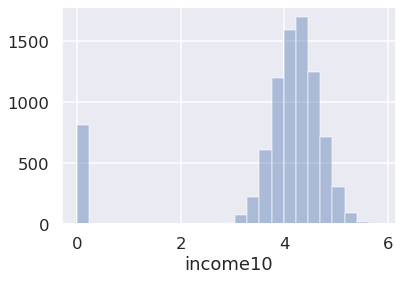

In [47]:
# YOUR CODE HERE
sns.distplot(df['income10'], kde=False, bins=25)

f4 = plt.gcf()

In [48]:
assert f4.gca().has_data()

# If you fail this test, you didn't use 25 bins for your histogram.
assert len(f4.gca().patches) == 25

**Question 4f:** From this plot, determine approximately how many individuals in `df` had a reported income of 0. Store this value in the variable `income_zero`.

In [49]:
# YOUR CODE HERE
income_zero = 750

In [50]:
assert isinstance(income_zero, int)


**Question 4g:** We might also have certain regulations or restrictions that we need to follow about the data. Here, we will only analyze adults. Remove all rows from `df` where age is less than 18.

In [51]:
# YOUR CODE HERE
df = df.drop(df.loc[df['age'] < 18].index)
df

,id,age,steps,income,income10
0,36859,48,6764,10056.43,4.00
1,99794,39,4308,13869.47,4.14
2,33364,36,6410,79634.92,4.90
...,...,...,...,...,...
10131,61626,44,7752,20096.38,4.30
10133,54972,44,7548,18350.20,4.26
10134,17411,43,8765,88965.55,4.95


In [52]:

assert min(df['age']) >= 18
assert len(df) == 8590


## Part 5 - Basic Analyses (1.1 points)

Now that we have wrangled and cleaned our data, we can start doing some simple analyses. 

Here we will explore some basic descriptive summaries of our data, look into the inter-relations (correlations) between variables, and ask some simple questions about potentially interesting subsets of our data. 

**Question 5a:** Use the `describe` `pandas` method to check a descriptive summary of the data. Save the DataFrame generated by `describe` to a new variable called `desc`.

In [53]:
# YOUR CODE HERE
desc = df.describe()
desc

,id,age,steps,income,income10
count,8590.00,8590.00,8590.00,8590.00,8590.00
mean,49757.71,40.57,7514.71,25553.03,3.85
std,28791.30,8.49,1510.03,33263.72,1.31
...,...,...,...,...,...
50%,49604.50,41.00,7498.00,15620.60,4.19
75%,74758.75,46.00,8538.50,31548.17,4.50
max,99993.00,74.00,13093.00,736621.28,5.87


In [54]:

assert isinstance(desc, pd.DataFrame)

**Question 5b:** Calculate the pairwise correlations between all variables.

Note: do this with a `pandas` method. Keep all columns (including ID). Assign the result (which should be a DataFrame) to a variable called `corrs`.

In [55]:
# YOUR CODE HERE
corrs = df.corr()
corrs

,id,age,steps,income,income10
id,1.00e+00,-4.26e-03,2.28e-03,-0.03,-0.01
age,-4.26e-03,1.00e+00,-2.81e-01,0.27,0.10
steps,2.28e-03,-2.81e-01,1.00e+00,0.05,0.03
income,-2.57e-02,2.70e-01,4.85e-02,1.00,0.47
income10,-1.23e-02,1.03e-01,2.52e-02,0.47,1.00


In [56]:

assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (5, 5)

**Question 5c:** Answer the following questions by setting your answer variables to either `'age'`, `'steps'`, or `'income'`.

- Which variable is most correlated with age (aside from `age` itself)? Record your answer in a variable called `age_corr`. 
- Which variable is most correlated with income (aside from `income` and `income10`)? Record your answer in a variable called `inc_corr`.

In [57]:
# YOUR CODE HERE
age_corr = 'income'
inc_corr = 'age'

In [58]:
assert age_corr
assert inc_corr
assert age_corr in {'steps', 'age', 'income'}
assert inc_corr in {'steps', 'age', 'income'}


**Question 5d:** How many steps would you have to walk to be in the top 10% of walkers? Save your answer as a variable called `top_walker`.

Hint: check out the `quantile` method.

In [59]:
# YOUR CODE HERE
quartile10 = df.quantile(q=0.9)
quartile10
top_walker = 9488.10

In [60]:
assert top_walker
assert isinstance(top_walker, float)


**Question 5e:** What is the average income for people over the age of 65? Save your response in a variable called `old_income`.

Note: We're asking for the actual income, not the log-10 of income.

In [61]:
# YOUR CODE HERE
#create new df for age column with just over 65 ages
#then take the mean of the income column
#df[df['steps']==-1]
avg_income = df[df['age']>65]
avg_income.mean()
old_income = 55419.49

In [62]:
assert old_income
assert old_income > 5


# Part 6 - Predictions (1.7 points)

Many analyses ask predictive questions in which data we have currently are used to build a model to predict something about the future (data we do not yet have).  

Here we will explore some basic predictions, looking into whether we might be able to predict income from our other variables.

Note: You will use the `np.polyfit` function from `NumPy` as we did in [Tutorials/02-DataAnalysis](https://nbviewer.jupyter.org/github/COGS108/Tutorials/blob/master/02-DataAnalysis.ipynb).


**Question 6a:** Use polyfit to fit a 1-degree linear model, predicting income from age. Call the output parameters `a1` and `b1`.

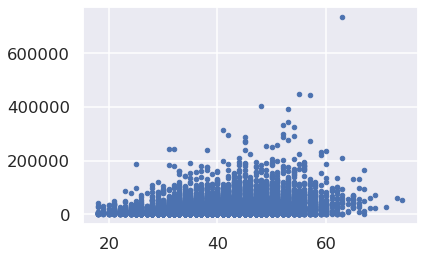

In [63]:
# YOUR CODE HERE
f, ax = plt.subplots()
income = df['income']
age = df['age']
ax.plot(age,income,'.')
a1,b1 = np.polyfit(age,income,1)

In [64]:

assert(a1)
assert(b1)

# If you fail these tests, your parameter values are quite far from what they
# should be.
assert abs(a1) > 100
assert abs(b1) > 100


**Question 6b:** Use the model parameters from 6a to predict the income of a 75-year-old. Call your prediction `pred_75`.

In [65]:
# YOUR CODE HERE
new_age = 75
pred_75 = a1 * new_age + b1
pred_75

62014.986585568186

In [66]:

assert(pred_75)


**Question 6c:** Use polyfit once more to fit a 1-degree linear model, predicting income from steps. Call the output parameters `a2` and `b2`.

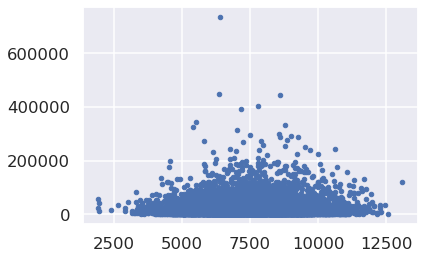

In [67]:
# YOUR CODE HERE
f, ax = plt.subplots()
income = df['income']
steps = df['steps']
ax.plot(steps,income,'.')
a2,b2 = np.polyfit(steps,income,1)

In [68]:
assert(a2)
assert(b2)

# If you fail these tests, your parameter values are quite far from what they
# should be.
assert abs(a2) < 100
assert abs(b2) > 100


**Question 6d:** Predict the income of someone who took 10,000 steps. Call your prediction `pred_10k`.

In [69]:
# YOUR CODE HERE
new_steps = 10000
pred_10k = a2 * new_steps + b2
pred_10k

28206.84739646251

In [70]:

assert(pred_10k)


**Question 6e:** To better understand a model, we can visualize its predictions. Use your first model to predict income from each integer age in between 18 and 80. Your predictions should be stored in a numpy array of floats called `pred_age`.

Reminder: `numpy` has the `arange` function

In [71]:
# YOUR CODE HERE
range_age = np.arange(18,81,1)
pred_age = a1 * range_age + b1
pred_age

array([ 1642.29457319,  2701.4646085 ,  3760.6346438 ,  4819.80467911,
        5878.97471441,  6938.14474972,  7997.31478502,  9056.48482033,
       10115.65485563, 11174.82489094, 12233.99492624, 13293.16496155,
       14352.33499685, 15411.50503216, 16470.67506746, 17529.84510276,
       18589.01513807, 19648.18517337, 20707.35520868, 21766.52524398,
       22825.69527929, 23884.86531459, 24944.0353499 , 26003.2053852 ,
       27062.37542051, 28121.54545581, 29180.71549112, 30239.88552642,
       31299.05556173, 32358.22559703, 33417.39563234, 34476.56566764,
       35535.73570295, 36594.90573825, 37654.07577356, 38713.24580886,
       39772.41584417, 40831.58587947, 41890.75591478, 42949.92595008,
       44009.09598539, 45068.26602069, 46127.436056  , 47186.6060913 ,
       48245.77612661, 49304.94616191, 50364.11619721, 51423.28623252,
       52482.45626782, 53541.62630313, 54600.79633843, 55659.96637374,
       56719.13640904, 57778.30644435, 58837.47647965, 59896.64651496,
      

In [72]:
assert isinstance(pred_age, np.ndarray)
assert len(pred_age) == 63

# Your array should contain decimals, not integers
assert isinstance(pred_age[0], float)


**Question 6f:** Make a scatter plot with income on the y-axis and age on the x-axis. Then, draw your predictions as a red line on top of the scatter plot. The data in your plot and your line should look like this (although the exact colors/dimensions/appearance may differ a bit):

![](income_steps_pred.png)

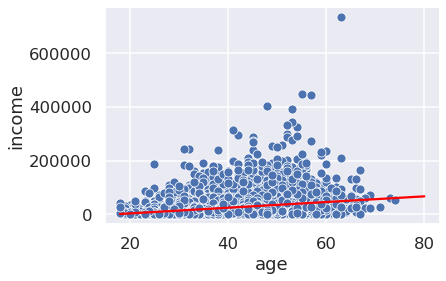

In [73]:
# YOUR CODE HERE
sns.scatterplot(x='age', y='income', data=df)
plt.plot(range_age,pred_age, color='red')

f5 = plt.gcf()

In [74]:
assert f5.gca().has_data()

**Question 6g:** Now, let's do the same for the model that uses steps.

Use your second model to predict income from each multiple of 100 steps in between 2000 and 13000. Your predictions should be stored in a numpy array called `pred_steps`.

In [75]:
# YOUR CODE HERE
range_steps = np.arange(2000,13100,100)
pred_steps = a2 * range_steps + b2

In [76]:
assert isinstance(pred_steps, np.ndarray)
assert len(pred_steps) == 111
# Your array should contain decimals, not integers
assert isinstance(pred_steps[0], float)


**Question 6h:** Make a scatter plot with income on the y-axis and steps on the x-axis. Then, draw your predictions as a red line on top of the scatter plot. Your plot should look like this:

![](income_age_pred.png)

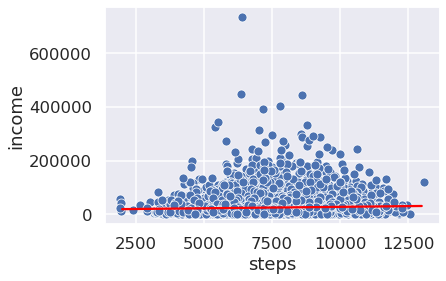

In [77]:
# YOUR CODE HERE
sns.scatterplot(x='steps', y='income', data=df)
plt.plot(range_steps,pred_steps, color='red')

f6 = plt.gcf()

In [78]:
assert f6.gca().has_data()

**Question 6i:** Notice that both these models perform poorly on this data. For this particular dataset, neither age nor steps seem to have a linear relationship with income. Nonetheless, fitting a linear model is simple and gives us a baseline to compare with more complex models in the future.

Suppose that you were forced to pick one of the above models. Between `'age'` and `'steps'`, which predictor has higher prediction power? Save your response in the variable `model_choice`.

In [79]:
# YOUR CODE HERE
model_choice = 'age'

In [80]:
assert model_choice
assert model_choice in {'age', 'steps'}


## Finished!

Have a look back over your answers, and also make sure to `Restart & Run All` from the kernel menu to double check that everything is working properly. You can also use the 'Validate' button above, which runs your notebook from top to bottom and checks to ensure all `assert` statements pass silently. When you are ready, submit on datahub!